# Housing Price Prediction - Exploratory Data Analysis (EDA)

Hello, and welcome. In this notebook, we will perform an exploratory analysis of the housing dataset to identify key patterns, relationships, and potential data quality issues prior to developing a predictive model

### 1- Loading and exploring the dataset



In [1]:
import pandas as pd

df = pd.read_csv("../data/housing_price_dataset.csv")

df.head()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


### 2- Data Overview

checking data types and basic statistics of the dataset

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [3]:
df.describe()


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [4]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

### 4- Handling Negative Price Values 

 remove any rows where the house price is negative as it is unrealistic


In [16]:

df = df[df['Price'] >= 0]
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49478.000000,49478.000000,49478.000000,49478.000000,49478.000000
mean,2006.832148,3.499960,1.995028,1985.397247,224910.294121
std,572.231237,1.115983,0.815904,20.721063,73750.768609
min,1000.000000,2.000000,1.000000,1950.000000,44328.569646
25%,1517.000000,3.000000,1.000000,1967.000000,170532.721073
50%,2008.000000,3.000000,2.000000,1985.000000,225100.123857
75%,2501.000000,4.000000,3.000000,2003.000000,278922.324888
max,2999.000000,5.000000,3.000000,2021.000000,406737.557926


### 5- outliers

In [6]:
# Create a function to detect outliers using IQR for a single column
def detect_outliers_iqr_single_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Outliers for Price column
outliers_price = detect_outliers_iqr_single_column(df, 'Price')
print("Outliers for Price column:")
print(outliers_price)

# Repeat the same for other columns like SquareFeet, Bedrooms, etc.
outliers_squarefeet = detect_outliers_iqr_single_column(df, 'SquareFeet')
print("Outliers for SquareFeet column:")
print(outliers_squarefeet)

outliers_bedrooms = detect_outliers_iqr_single_column(df, 'Bedrooms')
print("Outliers for Bedrooms column:")
print(outliers_bedrooms)

outliers_bathrooms = detect_outliers_iqr_single_column(df, 'Bathrooms')
print("Outliers for Bathrooms column:")
print(outliers_bathrooms)

outliers_yearbuilt = detect_outliers_iqr_single_column(df, 'YearBuilt')
print("Outliers for YearBuilt column:")
print(outliers_yearbuilt)


Outliers for Price column:
       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
2845         2999         5          2        Urban       1999  461502.014630
3285         2985         5          1        Rural       1961  456959.804367
3357         2928         3          3       Suburb       1962  457902.675442
3784         2901         2          3        Urban       1996  470989.679074
3967         2931         5          1        Rural       1983  453551.125469
4537         1102         2          1       Suburb       1967    5796.058628
7276         2957         2          3        Rural       1989  452870.618989
7430         2758         5          2        Rural       1967  492195.259972
8687         2883         2          3       Suburb       1978  444972.111219
11322        2888         2          2        Urban       1953  468470.378004
11330        2924         2          2        Rural       2000  446341.362223
12055        2888         5          

In [7]:
#clipping :)

lower_percentile = df['Price'].quantile(0.005)
upper_percentile = df['Price'].quantile(0.995)

df = df[(df['Price'] >= lower_percentile) & (df['Price'] <= upper_percentile)]




### Exploring the relationships between variables

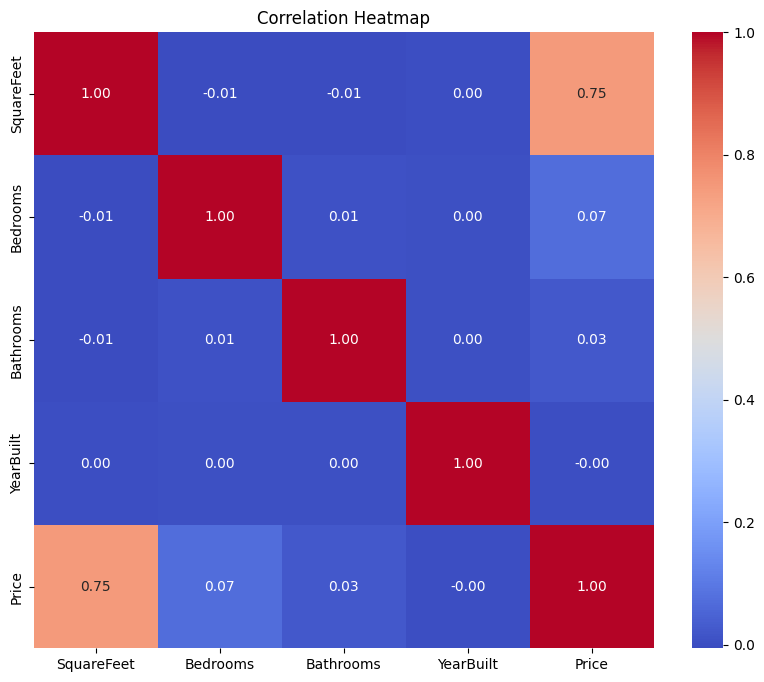

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


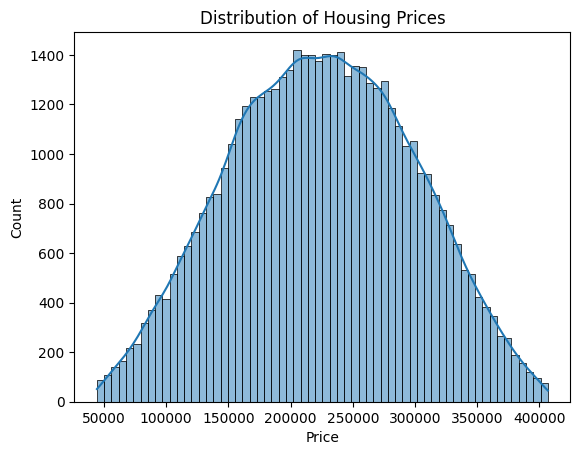

In [12]:


sns.histplot(df["Price"], kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [15]:

df.to_csv("../data/housing_price_dataset_clean.csv", index=False)
print("Cleaned data saved ")


Cleaned data saved 
